In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

fp_train = os.path.join('data', 'train.csv')

df = pd.read_csv(fp_train)

In [30]:
print(df.describe())
print(df.head())


# missing value
missing_value = df.isnull().sum()
print(missing_value)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1        

Survival Rate for Passengers with Missing Age: 0.2938
Overall Survival Rate: 0.3838


C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\3138793572.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = age_data.groupby('AgeGroup')['Survived'].mean().reset_index()
C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\3138793572.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=age_survival_rate, palette='viridis')


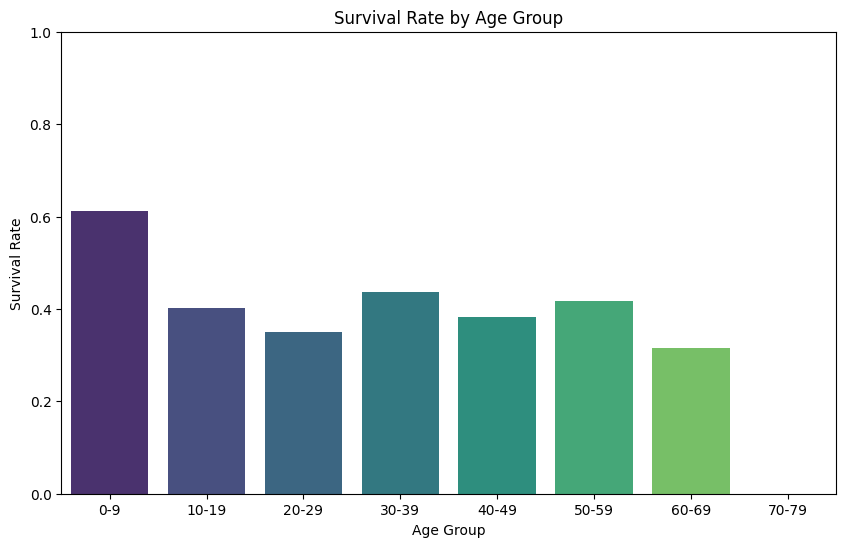

Survival Rate for Passengers with Missing Age: 0.2938
Overall Survival Rate: 0.3838


In [32]:
import matplotlib.pyplot as plt

# Drop rows with missing 'Age' for this analysis to ensure a clean visual
age_data = df.dropna(subset=['Age']).copy()

# Create age buckets. Adjust the bins as you see fit.
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create a new 'AgeGroup' column
age_data['AgeGroup'] = pd.cut(age_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by the new 'AgeGroup' and calculate the mean survival rate
age_survival_rate = age_data.groupby('AgeGroup')['Survived'].mean().reset_index()

# missing age survive rate
missing_age_survival_rate = df[df['Age'].isnull()]['Survived'].mean()
print(f"Survival Rate for Passengers with Missing Age: {missing_age_survival_rate:.4f}")

# overall survive rate
overall_survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=age_survival_rate, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for survival rate
plt.show()

# missing age survive rate
missing_age_survival_rate = df[df['Age'].isnull()]['Survived'].mean()
print(f"Survival Rate for Passengers with Missing Age: {missing_age_survival_rate:.4f}")

# overall survive rate
overall_survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.4f}")

In [33]:
# Create a new feature to indicate if 'Age' was missing
df['Age_is_missing'] = df['Age'].isnull().astype(int)

# Now, you can fill the missing 'Age' values with the median as a fallback,
# since the model now has a separate feature to account for this.
df['Age'] = df['Age'].fillna(df['Age'].median())

###  PClass
Passenger Class feature is an indicator for socioeconomic status, which likely influence where passagers were on the ship and their access to lifeboats

C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\2592989935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=pclass_survival_rate, palette='viridis')


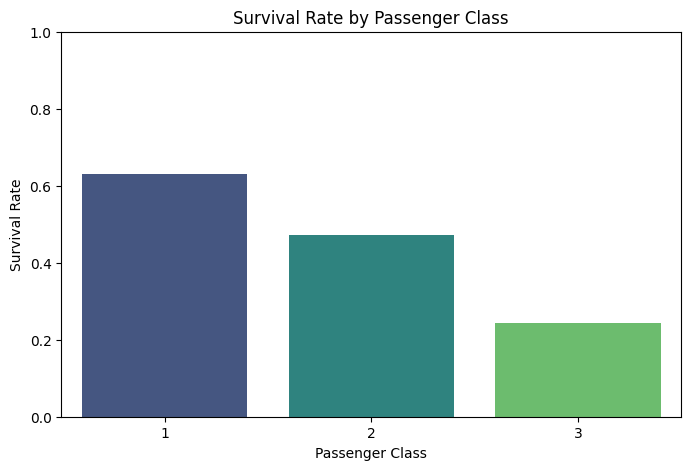

            mean  count
Pclass                 
1       0.629630    216
2       0.472826    184
3       0.242363    491


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Pclass' and calculate the mean survival rate
pclass_survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()
pclass_summary = df.groupby('Pclass')['Survived'].agg(['mean', 'count'])

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=pclass_survival_rate, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

print(pclass_summary)

### Parch and SibSp
we can combine these two feature to see the FamilySize.

In [43]:
# Group by 'SibSp' (siblings/spouses) and calculate the mean survival rate
# sibsp_survival_rate = df.groupby('SibSp')['Survived'].mean().reset_index()
sibsp_survival_rate = df.groupby('SibSp')['Survived'].agg(['mean', 'count']).reset_index()
print("Survival Rate by Siblings/Spouses (SibSp):")
print(sibsp_survival_rate)

# Group by 'Parch' (parents/children) and calculate the mean survival rate
# parch_survival_rate = df.groupby('Parch')['Survived'].mean().reset_index()
parch_survival_rate = df.groupby('Parch')['Survived'].agg(['mean', 'count']).reset_index()
print("\nSurvival Rate by Parents/Children (Parch):")
print(parch_survival_rate)

Survival Rate by Siblings/Spouses (SibSp):
   SibSp      mean  count
0      0  0.345395    608
1      1  0.535885    209
2      2  0.464286     28
3      3  0.250000     16
4      4  0.166667     18
5      5  0.000000      5
6      8  0.000000      7

Survival Rate by Parents/Children (Parch):
   Parch      mean  count
0      0  0.343658    678
1      1  0.550847    118
2      2  0.500000     80
3      3  0.600000      5
4      4  0.000000      4
5      5  0.200000      5
6      6  0.000000      1


### Fare Violin Plot

C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\3856395240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df, palette='muted')


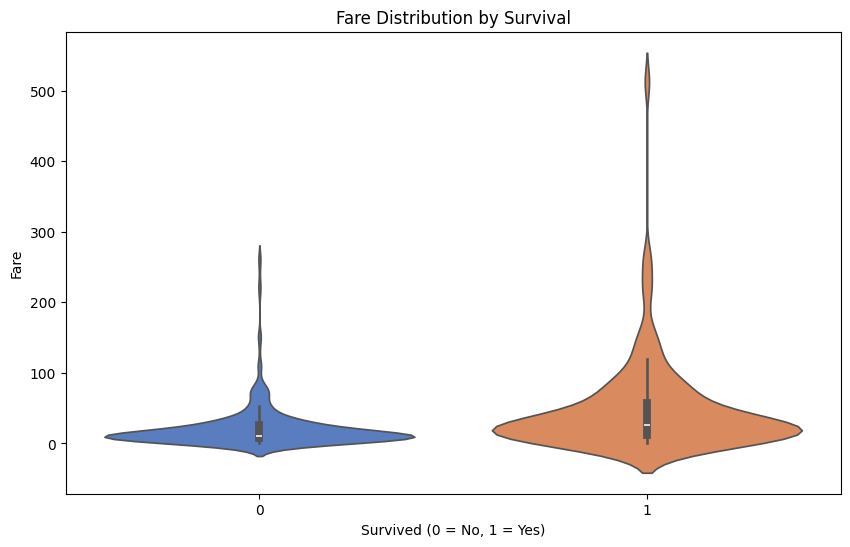

In [38]:
# Create a violin plot of 'Fare' vs 'Survived'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df, palette='muted')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

### Embarked
* S: Southampton
* C: Cherbourg
* Q: Queenstown

route: 
1. Southampton(England)
2. Cherbourg(France)
3. Queenstown(Ireland)
4. New York(USA)

In [45]:
# groupby Embark and aggregate to Survived

Embarked_summary = df.groupby('Embarked')['Survived'].agg(['mean', 'count']).reset_index()
print("Survival Rate by Embark port:")
print(Embarked_summary)

Survival Rate by Embark port:
  Embarked      mean  count
0        C  0.553571    168
1        Q  0.389610     77
2        S  0.336957    644


### Carbin
600+ field missing. but this value might be useful for its deck information, which reside in the first letter.

In [46]:
# Create a new feature for the first letter of the Cabin (the deck)
df['Deck'] = df['Cabin'].str[0]

# Replace missing cabins with 'U' for 'Unknown'
df['Deck'] = df['Deck'].fillna('U')

# Group by 'Deck' and see the survival rates
deck_summary = df.groupby('Deck')['Survived'].agg(['mean', 'count'])
print(deck_summary)

          mean  count
Deck                 
A     0.466667     15
B     0.744681     47
C     0.593220     59
D     0.757576     33
E     0.750000     32
F     0.615385     13
G     0.500000      4
T     0.000000      1
U     0.299854    687


### Name
1. title
2. family

In [47]:
# Extract the title from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check the unique titles and their counts
print("Unique Titles and Counts:\n", df['Title'].value_counts())

# Now, map less common titles to a single 'Other' category
common_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Other')

# Group by the new 'Title' feature and calculate survival rates
title_summary = df.groupby('Title')['Survived'].agg(['mean', 'count'])
print("\nSurvival Rate and Count by Title:\n", title_summary)

Unique Titles and Counts:
 Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Survival Rate and Count by Title:
             mean  count
Title                  
Dr      0.428571      7
Master  0.575000     40
Miss    0.697802    182
Mr      0.156673    517
Mrs     0.792000    125
Other   0.642857     14
Rev     0.000000      6


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\4208560346.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [68]:
# Create a 'Surname' column
df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0].strip())

# Identify family groups based on Surname, SibSp, and Parch
# The +1 accounts for the passenger themselves.
family = df.groupby(['Surname', 'SibSp', 'Parch']).size().reset_index(name='FamilySize')
family = family[family['FamilySize'] > 1] # Filter for groups of more than one person

# Now, we can merge this back into the main dataframe
df = pd.merge(df, family, on=['Surname', 'SibSp', 'Parch'], how='left')

# Create a new feature for 'IsAlone'
df['IsAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

# Group by 'IsAlone' and calculate survival rates
alone_survival_rate = df.groupby('IsAlone')['Survived'].mean().reset_index()
print(alone_survival_rate)

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### One-Hot Encoding for Categorical Features
# Convert categorical columns to a numerical format using one-hot encoding
categorical_cols = ['Sex', 'Embarked', 'Deck', 'Title']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Preparing Data for the Model
# Drop the original features that are not needed or are redundant
# This includes the original string columns, as well as name-related columns
X = df_encoded.drop([
    'Survived',
    'Name',
    'Ticket',
    'Cabin',
    'Surname',
    'FamilySize_x',
    'FamilySize_y'
], axis=1)

y = df_encoded['Survived']

### Splitting and Training the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

# You can also inspect the final features
print("\nFinal features used in the model:")
print(X_train.columns)

Model Accuracy: 0.8492

Final features used in the model:
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Age_is_missing', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_U', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Rev'],
      dtype='object')


In [72]:
# Assuming you have the test.csv file in the same directory
test_df = pd.read_csv('./data/test.csv')

# Apply the same preprocessing steps as the training data
# Age
test_df['Age_is_missing'] = test_df['Age'].isnull().astype(int)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Family feature engineering
test_df['IsAlone'] = ((test_df['SibSp'] == 0) & (test_df['Parch'] == 0)).astype(int)

# Title feature engineering
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']
test_df['Title'] = test_df['Title'].apply(lambda x: x if x in common_titles else 'Other')

# Cabin feature engineering
test_df['Deck'] = test_df['Cabin'].str[0]
test_df['Deck'] = test_df['Deck'].fillna('U')

# name feature engineering
test_df['Surname'] = test_df['Name'].apply(lambda x: x.split(',')[0].strip())
test_family = test_df.groupby(['Surname', 'SibSp', 'Parch']).size().reset_index(name='FamilySize')
test_family = test_family[test_family['FamilySize'] > 1]
test_df = pd.merge(test_df, test_family, on=['Surname', 'SibSp', 'Parch'], how='left')

# One-hot encoding for categorical features
categorical_cols = ['Sex', 'Embarked', 'Deck', 'Title']
test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Select the same features used for training
test_features = test_encoded[X.columns]

<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\1281585859.py:16: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\薛淞之\AppData\Local\Temp\ipykernel_34944\1281585859.py:16: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


KeyError: "['Deck_T'] not in index"

In [73]:
print(X.columns)

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Age_is_missing', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_U', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Rev'],
      dtype='object')


In [75]:
print(df['FamilySize_y'].head(10))

0    2.0
1    NaN
2    NaN
3    2.0
4    2.0
5    NaN
6    NaN
7    3.0
8    NaN
9    2.0
Name: FamilySize_y, dtype: float64


In [ ]:
print()